# Car Price Prediction: Advanced Feature Engineering Techniques for Linear Regression Algorithms

<img src="COVER.JPG" 
     align="center" 
     width="800" />



# Introduction

The automotive industry's dynamic landscape poses unique challenges in predicting car prices accurately. In this project, we delve into the intricacies of car price prediction using advanced feature engineering techniques coupled with various linear regression algorithms. The dataset, sourced from a prominent online car trading company in 2019, comprises information on nine distinct car models. Although relatively clean, the dataset demands meticulous preprocessing and feature engineering to enhance its predictive capabilities. The ensuing stages involve model building, thorough evaluation, hyperparameter tuning and model selection.

**Project Overview:**  

The primary objective of this undertaking is to explore and apply diverse machine learning algorithms -specifically linear models- providing a comprehensive implementation with detailed explanations where necessary. The central focus is on minimizing errors in predicting car prices. Our approach encompasses the application of an array of linear regression techniques and regularization methods, fostering an in-depth comparison to determine the most effective model.

**Data Exploration and Feature Engineering:**  

Initiating with the importation of dependencies and a preliminary data examination, we progress to exploratory data analysis (EDA) and feature engineering. Categorically and numerically distinct, the variables undergo meticulous scrutiny, including detailed visualizations and statistical analyses. Special attention is given to problematic categorical variables where observations contain multiple stacked values in a single cell. This challenge is addressed by processing the columns, assigning weighted grades to each car specification, and consolidating them into an overall grade. This transformation made a significant contribution to our model. Also some other features transformed in a more meaningful representation with feature engineering, again improving scores importantly.

**Handling Outliers and Transformation:**  

Correlation analysis reveals that engine power holds the highest correlation with price (0.7). Outliers, a common challenge, are addressed by grouping cars based on make-models and further regrouping them by kilometer ranges. Median prices are then calculated to identify and remove relative outliers. The target feature's right skewness is mitigated through log transformation.

**Linear Regression and Model Comparison:**  

The project meticulously applies various linear regression and regularization techniques, comparing their respective scores. Key feature engineering steps, such as log transformation, grading stacked specifications, and outlier removal, significantly enhance predictive accuracy. The comparison underscores the effectiveness of Lasso Regression, with its interpretability and emphasis on fewer features.

**Key Insights:**  

The analysis unveils the pivotal factors influencing car prices, with the make_model (brand) standing out as the most crucial determinant. Age, engine power, and kilometers follow as significant contributors. While the focus remains on linear regression in this notebook, the door is open for exploration into ensemble techniques for potentially improved scores.

**Future Considerations:**  

Opportunities for further improvement include exploring ensemble techniques such as Gradient Boosting Regressor or Random Forest Regressor etc. Additionally, there is room for nuanced feature engineering, particularly in refining stacked values with domain knowledge. Further regrouping cars based on nuanced criteria and addressing potential inconsistencies in data representation offer avenues for enhancement. Moreover, you can have a look to residuals part where we already prepared a depth analysis dataframe to dive into details to increase model performance

**Feature Selection**  
After deciding the best model and best performing variables, altough not neccessarily done each time, we decided to run the best model with an icreasing number of selected features from 1 to all possible features to make a comparison of model performance with different number of features. thanks to speed of linear regression algorithms and not too big dataset, we had a chance to showcase how feature selection works with a trade-off. Eventually we continued with only 6 features to model deployment, while we decreased features from 22 to 6 the model score only increased from 0.104278 (RMSE) to 0.108222 (%3.8) and R2 score from 0.93 to 0.925 (%0.5).

**Connect with Me:**  

For questions, collaborations, or further discussions, feel free to reach out on [Linkedin](https://www.linkedin.com/in/fatih-calik-469961237/), [Github](https://github.com/fatih-ml) or [Kaggle](https://www.kaggle.com/fatihkgg)

**This notebook serves as a comprehensive guide to linear regression modeling, laying the groundwork for future explorations into more advanced algorithms and nuanced feature engineering strategies.**

# 1. Import Dependencies, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from functions import train_val
import pickle

pd.set_option('Display.max_columns', 100)
pd.set_option('Display.max_rows', 100)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_scout_not_dummy.csv')
df.sample(3)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
15277,Renault Espace,Transporter,17000,Price negotiable,100000.0,Used,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Touch screen,Voice Control","ABS,Alarm system,Driver drowsiness detection,D...",3.0,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1734.0,front,4.7
655,Audi A1,Compact,12880,VAT deductible,68048.0,Used,Diesel,5.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,MP3,On-board computer,Radi...","Alloy wheels,Catalytic Converter,Sport package","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,66.0,0,Metallic,Cloth,Manual,1422.0,1180.0,front,3.4
13920,Renault Clio,Sedans,9300,VAT deductible,31500.0,Used,Benzine,5.0,"Cruise control,Electrical side mirrors,Power w...",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Driv...",1.0,1.0,54.0,0,Metallic,Part/Full Leather,Manual,1149.0,1134.0,front,5.6


In [3]:
df.shape

(15915, 23)

In [4]:
df.isnull().sum().sum()

0

In [5]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include='number').columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
Gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
Previous_Owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
Inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
Displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
Weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [7]:
df[categorical_features].describe().T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


# 2. Data Pre-Processing and Feature Engineering

## Feature Engineering on 4 Categorical Features: Converting

There are 4 features with stacked values, we need to preprocess this values. I want to preprocess them and make feature engineering. I will convert them into specs quantity

In [8]:
def convert_specs_to_scores(df, cols, bonus_points_dict):
    
    for col in cols:
        df[col] = df[col].str.split(',').apply(lambda specs: sum(2 if spec.strip() in bonus_points_dict.get(col, []) else 1 for spec in specs))
    return df


In [9]:
cat_columns_convert = ['Comfort_Convenience', 'Entertainment_Media', 'Safety_Security', 'Extras']

bonus_points_dict = {
    'Comfort_Convenience': ['Auxiliary heating', 'Heads-up display', 'Heated steering wheel', 'Massage seats', 'Parking assist system camera', 'Seat ventilation'  ],
    'Entertainment_Media': ['On-board computer', 'Sound system', 'Television'],
    'Safety_Security'    : ['Adaptive Cruise Control', 'Adaptive headlights', 'Lane departure warning system', 'Night view assist', 'Traffic sign recognition', 'Xenon headlights' ],
    'Extras'             : []
}

convert_specs_to_scores(df, cat_columns_convert, bonus_points_dict).head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,16,5,3,15,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,9,7,4,16,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,13,3,2,12,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,18,10,3,14,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,13,8,4,14,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


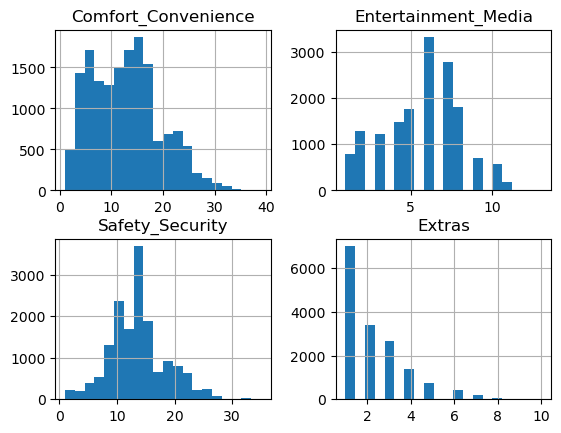

In [10]:
# lets see our converted new features 
df[cat_columns_convert].hist(bins=20);

## OneWay ANOVA for categorical Features

In [11]:
from scipy.stats import f_oneway
categorical_features = df.select_dtypes(include='object').columns
target_column = 'price'
anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-Value'])

# Perform ANOVA for each categorical feature
for feature in categorical_features:
    groups = [df[df[feature] == category][target_column] for category in df[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    # Append results to the DataFrame
    anova_results = anova_results.append({'Feature': feature, 'F-Statistic': f_stat, 'P-Value': p_value}, ignore_index=True)
anova_results

,Feature,F-Statistic,P-Value
0,make_model,1643.320448,0.000000e+00
1,body_type,531.792314,0.000000e+00
2,vat,132.678471,1.405412e-30
3,Type,820.381474,0.000000e+00
4,Fuel,6.742015,1.532728e-04
5,Paint_Type,30.139295,8.617890e-14
6,Upholstery_type,2795.527639,0.000000e+00
7,Gearing_Type,1848.401220,0.000000e+00
8,Drive_chain,204.037019,3.199242e-88


__It seems like all categorical features have some sort of significancy over the explanation of target feature__

## More Insights with Categorical Features

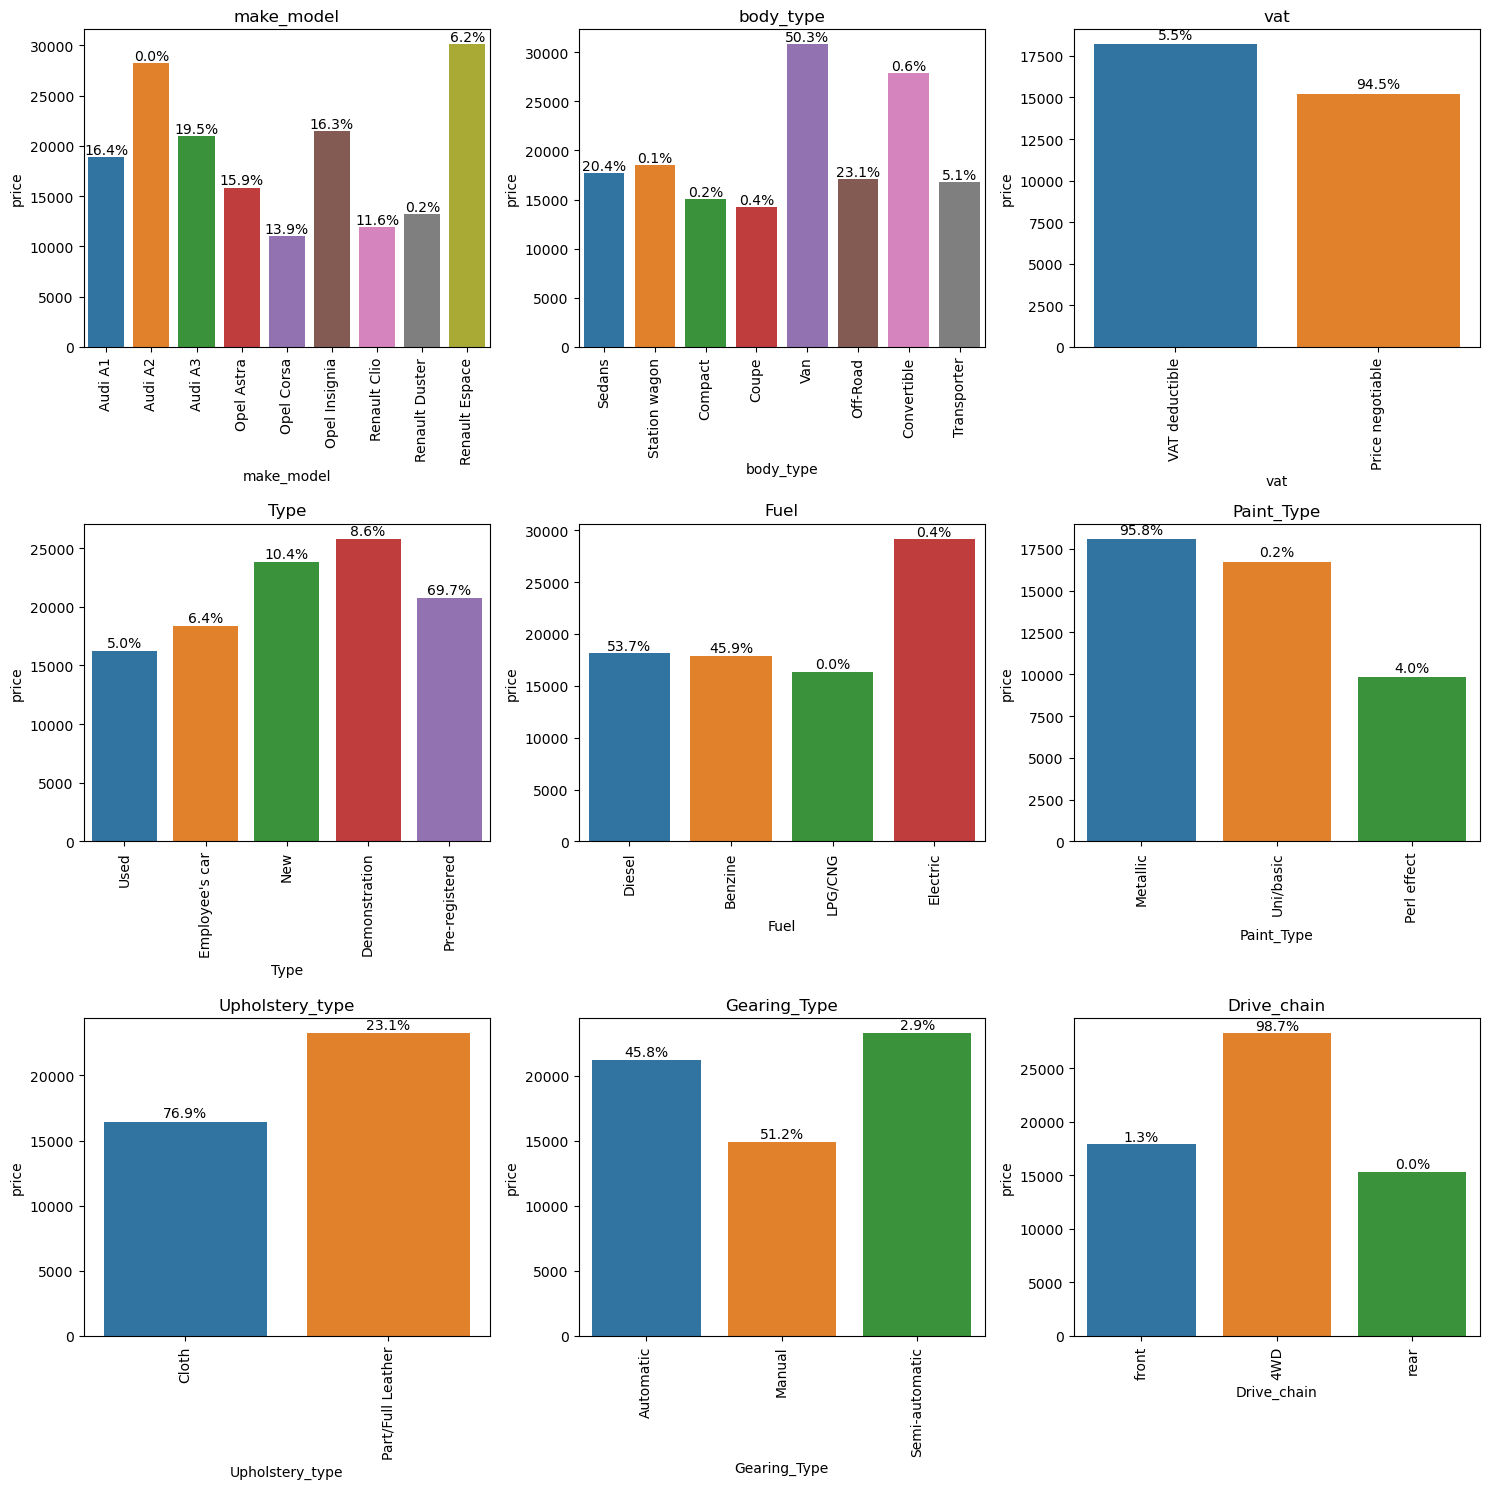

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Iterate through the columns and create bar plots
for i, col in enumerate(categorical_features):
    ax = axes[i]
    sns.barplot(ax=ax, data=df, x=col, y='price', ci=None)
    ax.set_title(col)
    ax.set_xticklabels(labels=list(df[col].unique()), rotation=90)

    # Calculate normalized value counts and add text on top of each bar
    total_count = df[col].count()
    vc = df[col].value_counts(normalize=True).sort_index()
    for vcidx, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.02 * total_count,  # You can adjust the position of the text
                '{:.1%}'.format(vc.values[vcidx]),
                ha="center")

plt.tight_layout()
plt.show()


## Label Encoding: is there any ordinal categorical features?

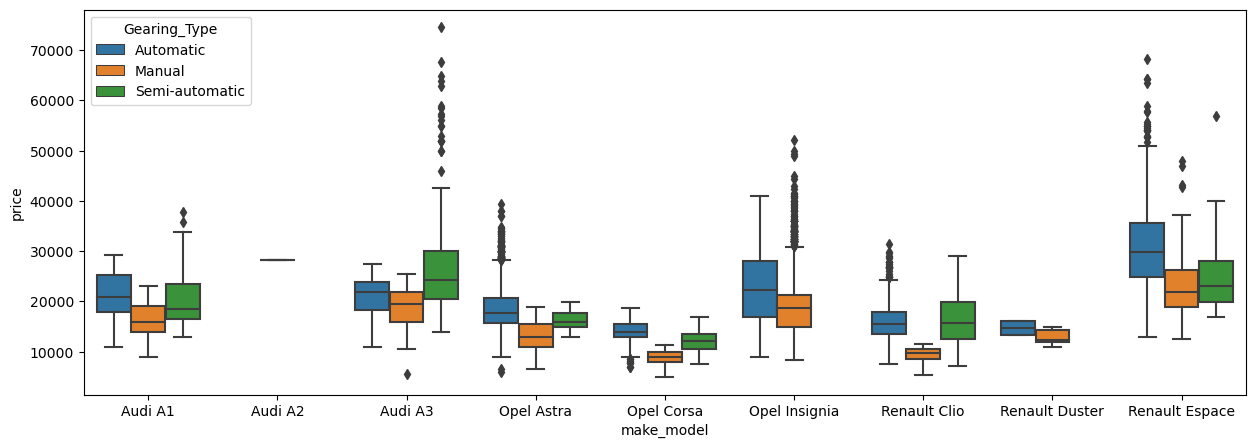

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x='make_model', y='price', data=df, hue='Gearing_Type');

__it seems like there is a patterns, so lets encode them accordingly__  
__this didnt create a positive effect on the scores__

## Numerical Columns: Relationships with Target

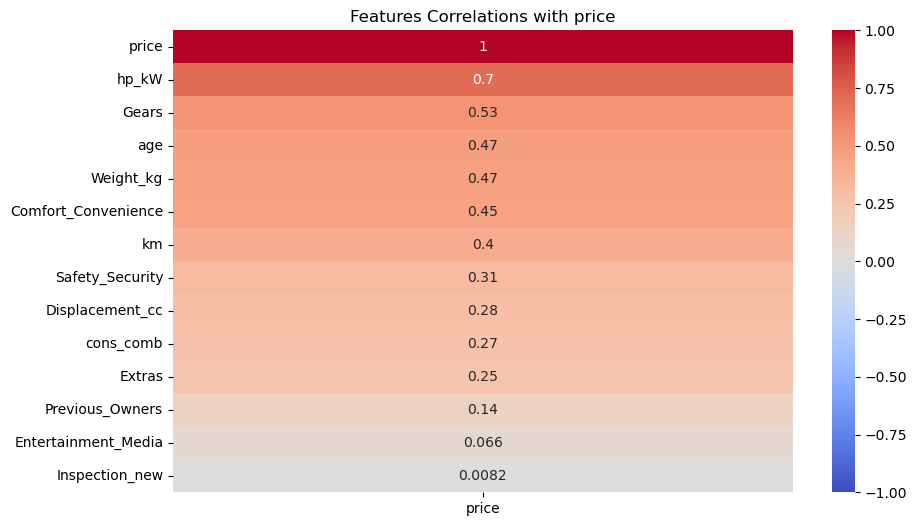

In [14]:
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

__Our new friend has an important correlation with the target feature: Comfort convenience__

## Multi Collinearity

In [15]:
def color_red(val):
    if np.abs(val) > 0.90 and np.abs(val) < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [16]:
df.drop(columns=[target_column]).corr().style.applymap(color_red)

,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
km,1.000000,-0.033171,-0.046805,0.006503,0.018552,-0.023897,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
Gears,-0.033171,1.000000,0.297072,0.086011,0.225729,0.203040,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
Comfort_Convenience,-0.046805,0.297072,1.000000,0.504459,0.603563,0.748405,-0.106653,0.015368,0.533572,0.217745,0.303172,0.332921,0.275229
Entertainment_Media,0.006503,0.086011,0.504459,1.000000,0.484859,0.532417,-0.003321,0.009123,0.107008,0.161817,0.063668,-0.034436,0.088199
Extras,0.018552,0.225729,0.603563,0.484859,1.000000,0.596435,-0.025550,0.013247,0.354838,0.150908,0.215143,0.149661,0.173168
Safety_Security,-0.023897,0.203040,0.748405,0.532417,0.596435,1.000000,-0.065479,0.022741,0.388537,0.194248,0.242276,0.205184,0.225737
age,0.758306,-0.064524,-0.106653,-0.003321,-0.025550,-0.065479,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
Previous_Owners,0.157041,-0.036612,0.015368,0.009123,0.013247,0.022741,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kW,0.004217,0.449793,0.533572,0.107008,0.354838,0.388537,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
Inspection_new,-0.049443,-0.011096,0.217745,0.161817,0.150908,0.194248,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814


## Outlier Handling

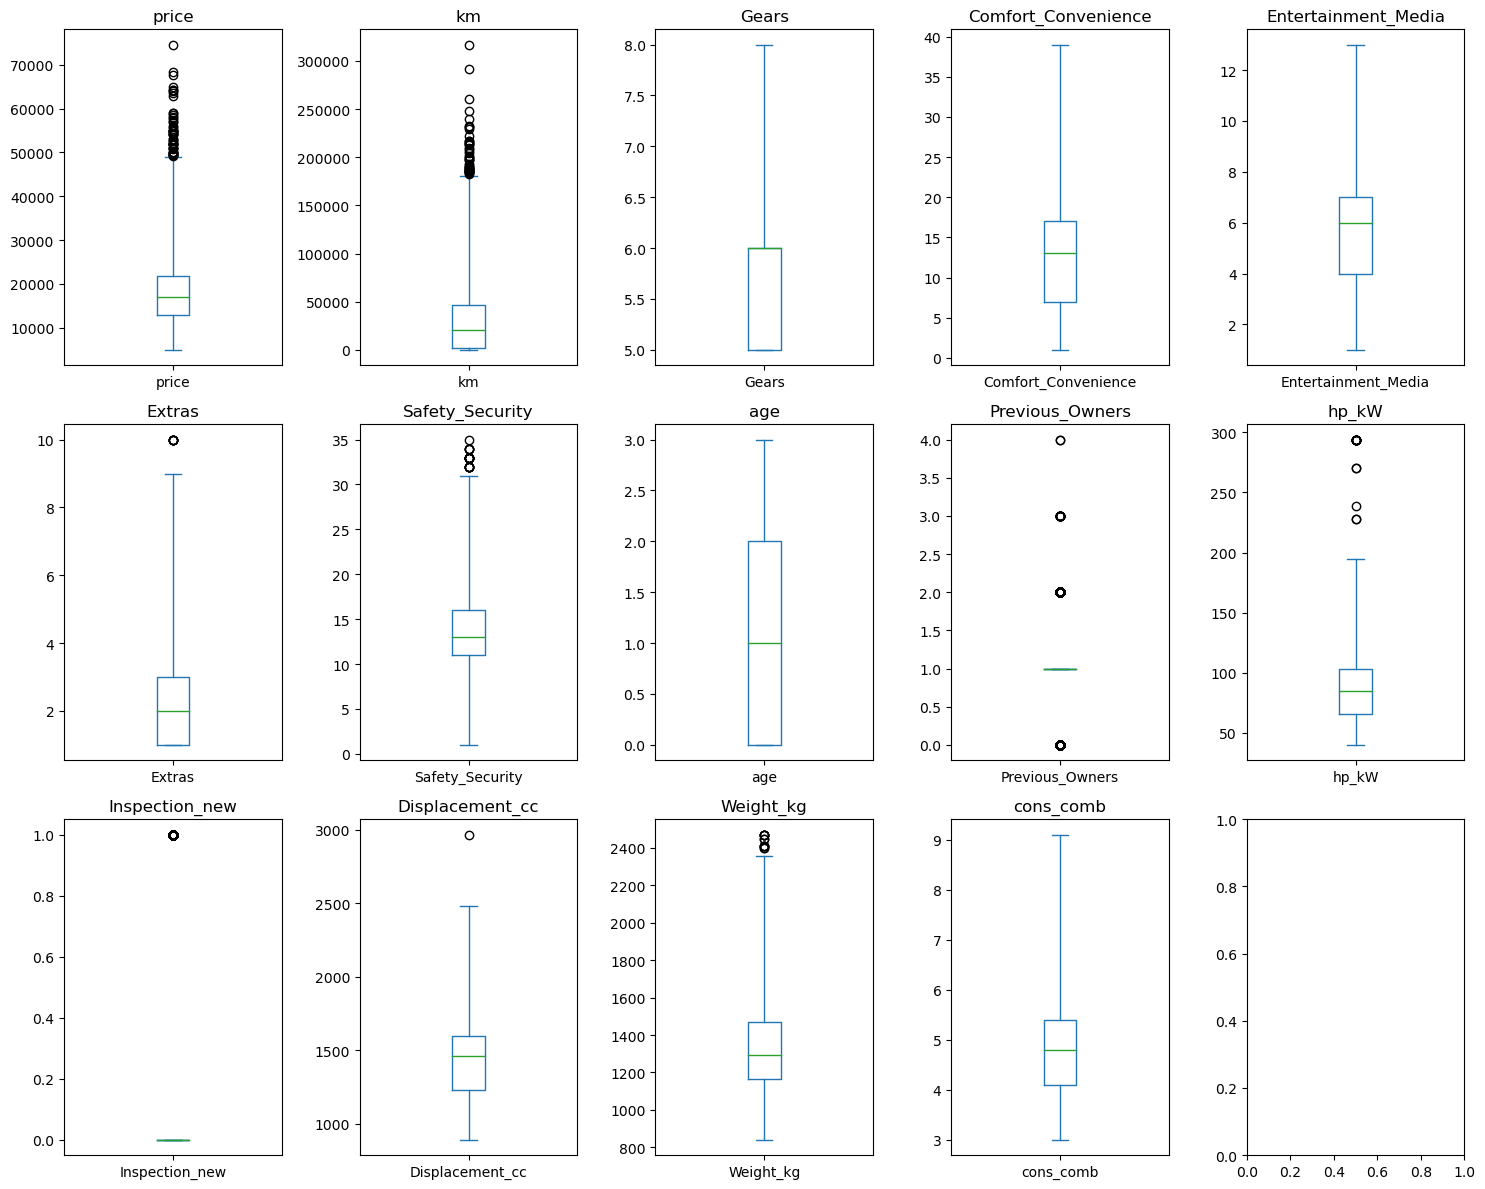

In [17]:
# boxplot for numerical features
numerical_features = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(3, 5, figsize=(15, 12))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(numerical_features):
    df[col].plot.box(ax=axes[i], whis=3)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

__I will calculate outlier limits according to sub categories of make_model and their km_groups__  
__Then i will drop these outliers__

In [18]:
# Define km ranges
km_ranges = [0, 1000, 20000, 50000, 100000, 150000, 250000, float('inf')]
km_labels = ['0-1000', '10000-20000', '20000-50000', '50000-100000', '100000-150000', '150000-250000', '250000+']

# Create a new column for 'km_group' based on the specified ranges
df['km_group'] = pd.cut(df['km'], bins=km_ranges, labels=km_labels, right=False)

# Group by 'make_model' and 'km_group' and calculate the median price for each group
grouped_df = df.groupby(['make_model', 'km_group'])['price'].median().reset_index()
grouped_df['25'] = df.groupby(['make_model', 'km_group'])['price'].quantile(0.25).reset_index()['price']
grouped_df['75'] = df.groupby(['make_model', 'km_group'])['price'].quantile(0.75).reset_index()['price']
grouped_df['lower_band'] = grouped_df['25'] - (1.5 * (grouped_df['75'] - grouped_df['25']))
grouped_df['upper_band'] = grouped_df['75'] + (1.5 * (grouped_df['75'] - grouped_df['25']))
grouped_df.drop(columns=['price', '25', '75'], inplace=True)

merged_df = pd.merge(df, grouped_df, on=['make_model', 'km_group'], how='left')
outlier_indexes = merged_df[(merged_df.price < merged_df.lower_band) | (merged_df.price > merged_df.upper_band)].index
print(len(outlier_indexes))
print(df.shape)
df.drop(index=outlier_indexes, inplace=True)
df.drop(columns=['km_group'], inplace=True)
print(df.shape)

507
(15915, 24)
(15408, 23)


## Log Transformation: Price

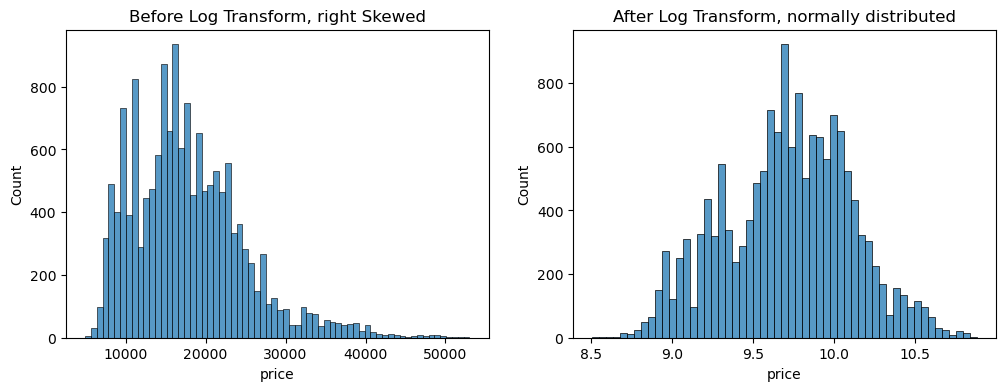

In [19]:
small_constant = 0.0001   # this is to prevent infinity after log transformation
y = np.log(df['price'] + small_constant)

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes= axes.flatten()
sns.histplot(df['price'], ax=axes[0])
sns.histplot(y, ax=axes[1])
axes[0].set_title('Before Log Transform, right Skewed')
axes[1].set_title('After Log Transform, normally distributed')
plt.show()

In [20]:
X = df.drop(columns=['price'])
print(X.shape)
print(y.shape)

(15408, 22)
(15408,)


## Encoding

In [21]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, prefix_sep='*', drop_first=True)
X_encoded.shape

(15408, 43)

# 3. Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13867, 43)
(13867,)
(1541, 43)
(1541,)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Linear Regression

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, Ridge, ElasticNet, ElasticNetCV

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
y_pred = linear_model.predict(X_test_scaled)
y_train_pred = linear_model.predict(X_train_scaled)

lm_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'linear_regression')
lm_scores

,linear_regression_train,linear_regression_test
R2,0.928162,0.930574
rmse,0.104634,0.104430


In [29]:
scoring = ['r2', 'neg_mean_squared_error']

lm_cv_scores = cross_validate(linear_model, X_train_scaled, y_train, scoring = scoring, cv=10)
lm_cv_scores = pd.DataFrame(lm_cv_scores)
print(f"R2 Scores Mean: {lm_cv_scores['test_r2'].mean()}")
print(f"RMSE Scores Mean: {lm_cv_scores['test_neg_mean_squared_error'].mean()} \n")
lm_cv_scores.iloc[:,2:]

R2 Scores Mean: -0.9991765444540437
RMSE Scores Mean: -0.2849963169946878 



,test_r2,test_neg_mean_squared_error
0,0.930158,-0.010626
1,0.924985,-0.011323
2,0.922097,-0.012024
3,0.934340,-0.010633
4,0.928465,-0.010432
5,0.924976,-0.010986
6,0.928091,-0.010946
7,0.831358,-0.027025
8,0.227667,-0.121811
9,-17.543902,-2.624156


# 5. Lasso Regularization

In [30]:
alpha_space = np.logspace(-3, 2, 100)
lasso_model = LassoCV(alphas=alpha_space, cv=10, max_iter=100_000, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=10, max_iter=100000, random_state=42)

In [31]:
lasso_model.alpha_

0.001

In [32]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

lasso_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso_model')
lasso_scores

,lasso_model_train,lasso_model_test
R2,0.927478,0.930775
rmse,0.105131,0.104278


# 6. Ridge Regularization

In [33]:
ridge_model = RidgeCV(alphas=alpha_space, cv=10, scoring='neg_root_mean_squared_error')
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [34]:
ridge_model.alpha_

3.4304692863149193

In [35]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge_model')
ridge_score

,ridge_model_train,ridge_model_test
R2,0.928162,0.930573
rmse,0.104634,0.104431


# 7. ElasticNet regression and GridSearchCV

In [36]:
elastic_model = ElasticNet(max_iter=10_000, random_state=42)

In [37]:
param_grid = {
    'alpha' : [0.001, 0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1.0],
    'l1_ratio' : [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
}

In [38]:
grid_model = GridSearchCV(
    estimator = elastic_model,
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    cv = 5
)

In [39]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1.0],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]},
             scoring='neg_root_mean_squared_error')

In [40]:
grid_model.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [41]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

grid_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'grid_search')
grid_scores

,grid_search_train,grid_search_test
R2,0.928147,0.930680
rmse,0.104645,0.104351


# 8. comparison of Models and Model Evaluation

## Comparison of All Models

In [42]:
pd.concat([lm_scores, lasso_scores, ridge_score, grid_scores], axis=1)

,linear_regression_train,linear_regression_test,lasso_model_train,lasso_model_test,ridge_model_train,ridge_model_test,grid_search_train,grid_search_test
R2,0.928162,0.930574,0.927478,0.930775,0.928162,0.930573,0.928147,0.930680
rmse,0.104634,0.104430,0.105131,0.104278,0.104634,0.104431,0.104645,0.104351


## Iterations and Feature Engineering Results

In [43]:
# First model runs

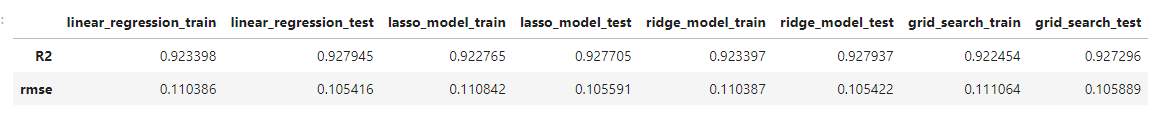

In [44]:
# Dropping some outliers (combined method: make_model, IQR km ranges and prices) (IQR 3)

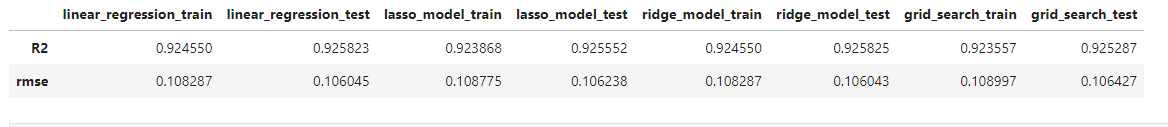

In [45]:
# Dropping more outliers (combined method: make_model, IQR km ranges and prices) (IQR 1.5)

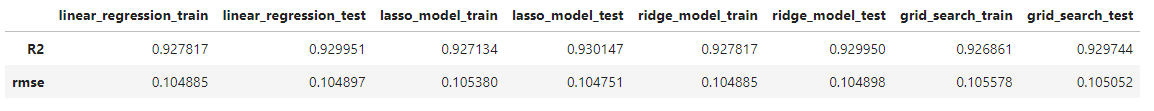

In [46]:
# iteration with label encoding of Gear_type, not increased the performance

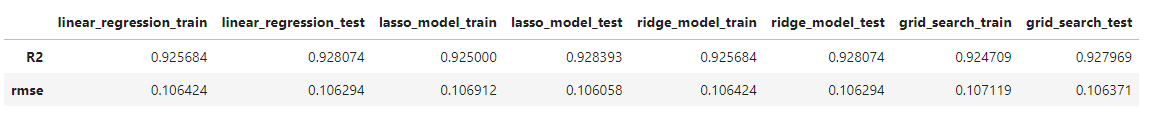

In [47]:
# weighted scores of specs for 4 categorical -stacked columns (BEST SCORES, ever in the notebook)

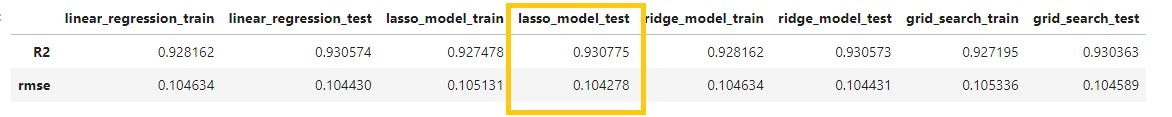

In [48]:
# For a better explanation of feature importances, i decided to run the model with median car prices feature rather than encoded car make_models
# it gives a better and clear commentability of feature importances
# make_model degiskenini median_price ile degistirdigimiz zaman gelen sonuclar
# however not adding value to model, as i expected

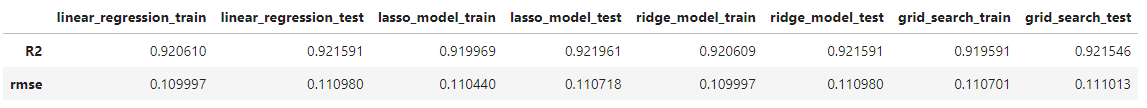

# 9. Best Model & Feature Selection

## Build Best Model and Scores

In [49]:
best_model = Lasso(alpha=0.001, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
y_train_pred = best_model.predict(X_train_scaled)

best_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'best_model')
best_scores

,best_model_train,best_model_test
R2,0.927478,0.930775
rmse,0.105131,0.104278


In [50]:
#adjusted r2
from functions import adjusted_r2_score

adj_r2 = adjusted_r2_score(y_test, y_pred, len(X_encoded), X_encoded.shape[1])
print(f"Adjusted R2 Score = {adj_r2:.3f}")

Adjusted R2 Score = 0.931


In [51]:
# RMSE / price.mean()
error_mean_price_ratio = 100 * best_scores.iloc[1,1] / y.mean()
print(f"RMSE / Mean Price Ratio [%] = {error_mean_price_ratio:.2f}")

RMSE / Mean Price Ratio [%] = 1.07


## Residuals

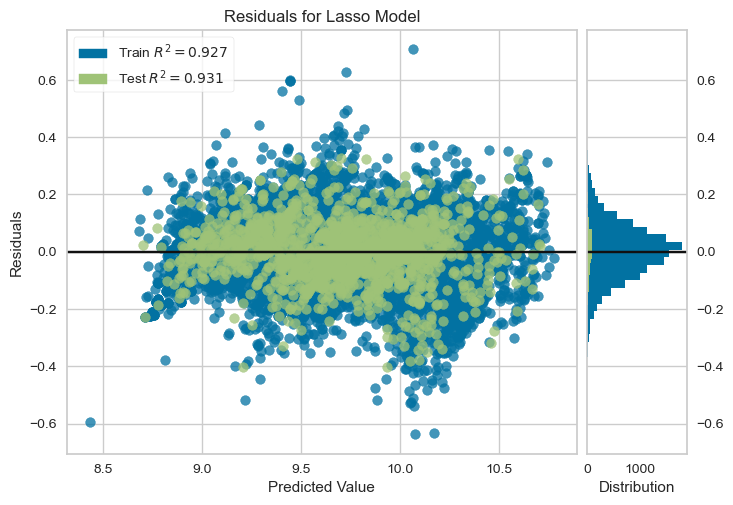

In [52]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

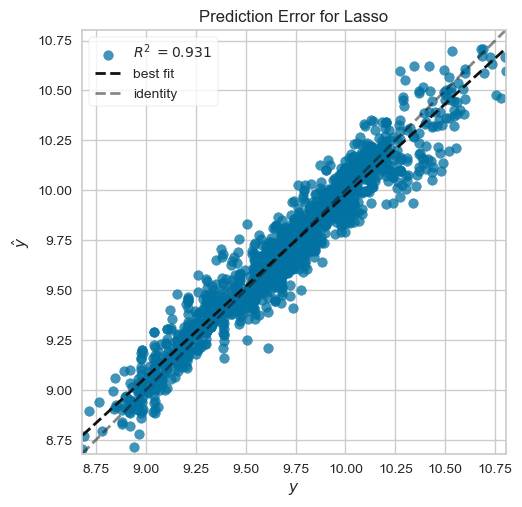

In [53]:
visualizer = PredictionError(best_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

**We can check individual worst predictions and residuals**  
**i instantly understood that there is a problem with Renault Escape prediction**  
The model can be adjusted with more detailed analysis

In [54]:
from functions import residual_analysis_df
residuals_df = residual_analysis_df(df=X, y_test=y_test, y_pred=y_pred, cols=['make_model', 'km', 'Type', 'age', 'hp_kW'])
residuals_df.groupby('make_model')['Residuals'].mean()

make_model
Audi A1           1312.162896
Audi A3           1474.806537
Opel Astra        1211.851736
Opel Corsa         679.763349
Opel Insignia     2064.232318
Renault Clio      1194.444412
Renault Duster     923.102639
Renault Espace    3168.888902
Name: Residuals, dtype: float64

## Renault Espace & Opel Insignia: What is the Problem?

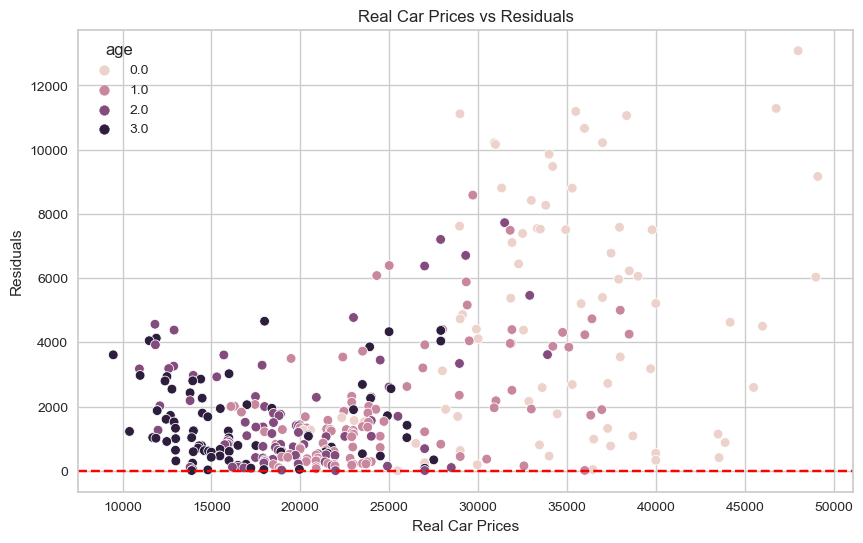

In [55]:
residuals_df_RE_OI = residuals_df[(residuals_df['make_model'] == 'Renault Espace') | (residuals_df['make_model'] == 'Opel Insignia')]

plt.figure(figsize = (10,6))
sns.scatterplot(data=residuals_df_RE_OI, x='Real_Price', y='Residuals' , hue='age')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Real Car Prices vs Residuals')
plt.xlabel('Real Car Prices')
plt.ylabel('Residuals')
plt.show()

__it'seen that as the cars get luxury and brand new the model is more prone to make bigger errors__  
__i will not go further about this issue, but this issue can be worked with more feature engineering or more complex models need to be chosen :)__

## Feature Importances

                              Feature  Importance
16              make_model*Opel Corsa    0.146255
18            make_model*Renault Clio    0.121543
6                                 age    0.101669
8                               hp_kW    0.090770
0                                  km    0.088308
15              make_model*Opel Astra    0.079018
39                Gearing_Type*Manual    0.062557
2                 Comfort_Convenience    0.048709
20          make_model*Renault Espace    0.042987
14                 make_model*Audi A3    0.036277
32                          Type*Used    0.034917
19          make_model*Renault Duster    0.020524
29                Type*Employee's car    0.020452
1                               Gears    0.017733
31                Type*Pre-registered    0.017111
17           make_model*Opel Insignia    0.015671
38  Upholstery_type*Part/Full Leather    0.010258
3                 Entertainment_Media    0.009936
33                        Fuel*Diesel    0.008481


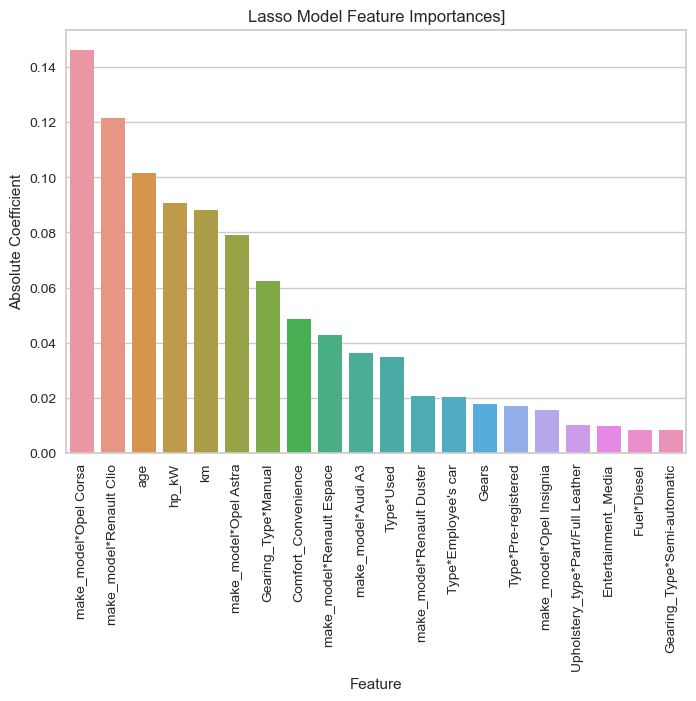

In [56]:
from functions import FeatureImportances

f_imp = FeatureImportances(best_model.coef_, X_encoded, 'Lasso Model')
print(f_imp.show_feature_importances_df().head(20), '\n')
f_imp.barplot_feature_importances(20)

## Feature selection

__WHAT IS THE BEST FEATURE QUANTITY FOR SELECTION?__

In [57]:
def decoded_feature_importances_list(feat_imp_df):
    """
    it takes feature importances dataframe with encoded labels
    turns decoded and sorted features list
    returns a list of feature names as original in initial df
    """
    features_selected = []
    for feature in feat_imp_df['Feature']:
        temporary_feature = feature.split('*')[0]
        if temporary_feature not in features_selected:
            features_selected.append(temporary_feature)
    return features_selected

In [58]:
def preprocess_data(X, cols):
    # Encoding
    df = X[cols]
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features, prefix_sep='*', drop_first=True)
    return df_encoded

In [59]:
def fit_model(model, X_encoded, y, test_size=0.1, random_state=42):
    # train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=test_size, random_state=random_state)
    
    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # model fit
    model.fit(X_train_scaled, y_train)
    
    # scores
    y_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)
    scores = train_val(y_train, y_train_pred, y_test, y_pred, f'{len(cols)} Features')    
    return scores

In [60]:
# Call our object (f_imp) and our method (show_feature_importances_df)
feat_imp_df = f_imp.show_feature_importances_df()

# call our function (decoded_feature_importances_list)
features_sorted = decoded_feature_importances_list(feat_imp_df)

# Create a dict to stack our scores with different model runs with n number of selected features
# Lets iterate from 1 to 22 and each time calculate r2 and RMSE, then we will plot
all_scores = {}
for i in range(1, len(features_sorted)+1):
    
    # create a column list, each time increasing quantity of features selected
    cols = features_sorted[:i]
    
    # preprocess our data with n number of features
    X_encoded = preprocess_data(X, cols)
    
    # model run and calculate scores, record them into all_scores dict
    scores = fit_model(X_encoded=X_encoded, y=y, model=best_model, test_size=0.1, random_state=42)
    all_scores[i] = {'R2_Test': scores.iloc[0,1], 'RMSE_Test': scores.iloc[1,1]}

    
# convert stacked scores in all_scores to variables for plotting easier
feature_quantities = list(all_scores.keys())
r2_scores = [entry['R2_Test'].round(3) for entry in all_scores.values()]
rmse_scores = [entry['RMSE_Test'].round(3) for entry in all_scores.values()]

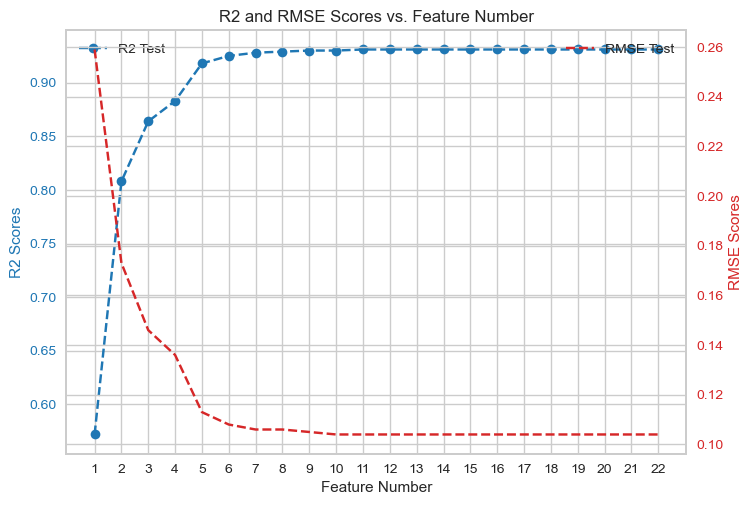

In [61]:
fig, ax1 = plt.subplots()

# Plot R2 Test scores
color = 'tab:blue'
ax1.set_xlabel('Feature Number')
ax1.set_ylabel('R2 Scores', color=color)
ax1.plot(feature_quantities, r2_scores, marker='o', label='R2 Test', linestyle='dashed', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1,23,1))
ax1.legend(loc='upper left')

# Create a second y-axis for RMSE scores
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('RMSE Scores', color=color)
ax2.plot(feature_quantities, rmse_scores, marker='x', label='RMSE Test', linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('R2 and RMSE Scores vs. Feature Number')
plt.show()

In [62]:
# 6 features is the best, here is the scores
n = 6
cols = features_sorted[:n]
X_encoded_6feat = X_encoded=preprocess_data(X, cols)
fit_model(X_encoded=X_encoded_6feat, y=y, model=best_model, test_size=0.1, random_state=42)

,6 Features_train,6 Features_test
R2,0.920857,0.925441
rmse,0.109825,0.108222


# 11. Deploying the model

In [63]:
import pickle